A Linear regression implementation code for predicting VWAP price of RELIANCE. data taken from yahoo finance.

In [107]:
import numpy as np
import pandas as pd         
import matplotlib.pyplot as plt

In [108]:
dataset = pd.read_csv("./RELIANCE.csv")
dataset #display sample data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0,0.2857


In [109]:
dataset.isnull().sum()
#finding number of columns which are not useful

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [110]:
dataset.dropna(how='any',inplace=True)
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.50,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.50,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.00,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.60,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.60,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0,0.2857


In [111]:
dataset.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [112]:
to_drop = ['Date', 'Symbol', 'Series','%Deliverble']
dataset = dataset.drop(columns = to_drop)
dataset

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
2850,951.85,952.00,958.65,943.65,947.50,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0
2851,946.80,936.55,954.70,936.55,952.50,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0
2852,951.05,960.50,967.00,931.50,936.00,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0
2853,934.60,934.65,940.80,928.15,938.60,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0
2854,937.75,933.55,960.00,933.55,959.60,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0
...,...,...,...,...,...,...,...,...,...,...,...
5199,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0
5200,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0
5201,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0
5202,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0


## input features and target

In [113]:
dataset.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume'],
      dtype='object')

In [114]:
target = ['VWAP']
Y = dataset[target]
Y

,VWAP
2850,947.83
2851,947.09
2852,951.69
2853,935.29
2854,950.55
...,...
5199,1952.18
5200,1952.11
5201,1969.06
5202,1946.67


In [115]:
X = dataset.drop(columns = ['VWAP','Deliverable Volume'])
X

,Prev Close,Open,High,Low,Last,Close,Volume,Turnover,Trades
2850,951.85,952.00,958.65,943.65,947.50,946.80,1838452,1.742538e+14,58630.0
2851,946.80,936.55,954.70,936.55,952.50,951.05,2152963,2.039039e+14,63061.0
2852,951.05,960.50,967.00,931.50,936.00,934.60,4368279,4.157238e+14,128784.0
2853,934.60,934.65,940.80,928.15,938.60,937.75,1405741,1.314771e+14,43384.0
2854,937.75,933.55,960.00,933.55,959.60,958.25,4025919,3.826839e+14,88703.0
...,...,...,...,...,...,...,...,...,...
5199,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,20918665,4.083704e+15,497781.0
5200,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,14277083,2.787044e+15,362587.0
5201,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,15062376,2.965874e+15,356793.0
5202,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,11924527,2.321309e+15,266412.0


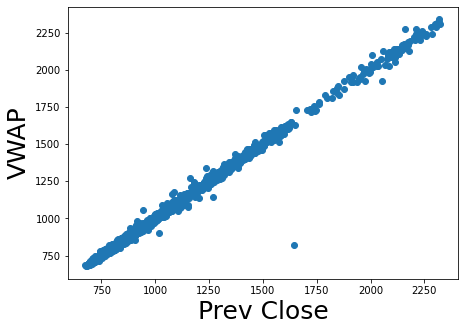

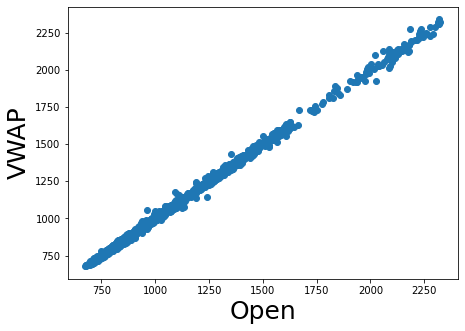

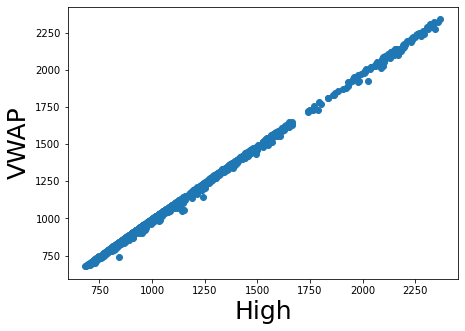

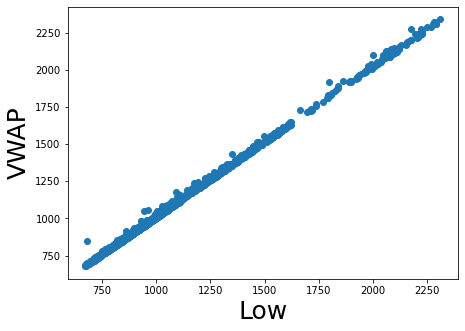

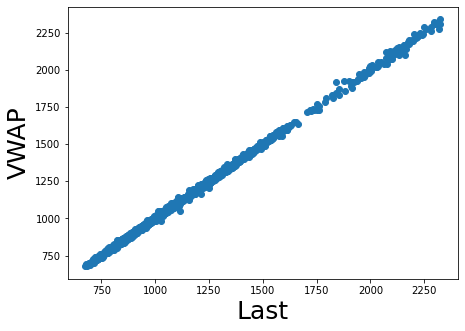

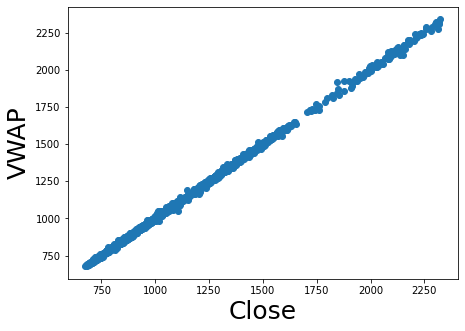

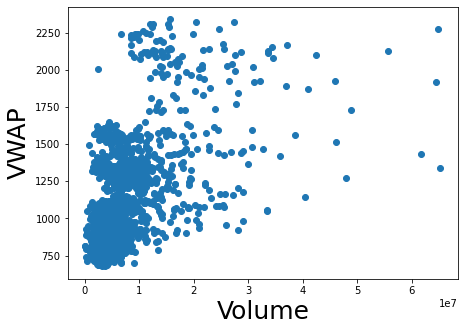

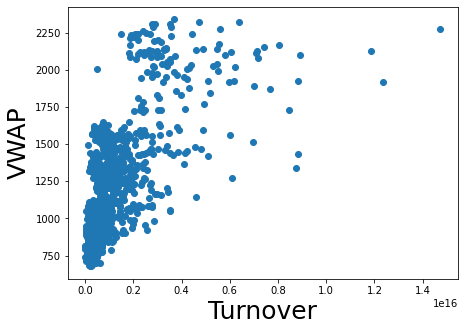

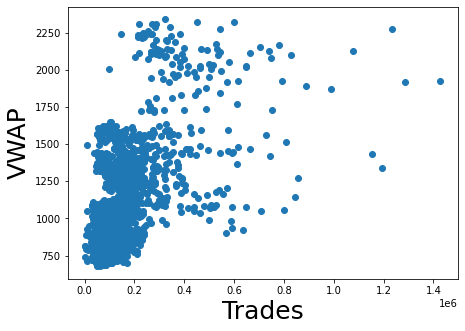

In [116]:
for feature_name in X:
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    plt.scatter(X[feature_name], Y)
    plt.ylabel(target[0],size = 25)
    plt.xlabel(feature_name, size = 25)
    plt.show()

In [117]:
X = np.array(X)
X

array([[9.51850000e+02, 9.52000000e+02, 9.58650000e+02, ...,
        1.83845200e+06, 1.74253844e+14, 5.86300000e+04],
       [9.46800000e+02, 9.36550000e+02, 9.54700000e+02, ...,
        2.15296300e+06, 2.03903946e+14, 6.30610000e+04],
       [9.51050000e+02, 9.60500000e+02, 9.67000000e+02, ...,
        4.36827900e+06, 4.15723780e+14, 1.28784000e+05],
       ...,
       [1.96405000e+03, 1.98000000e+03, 1.99295000e+03, ...,
        1.50623760e+07, 2.96587440e+15, 3.56793000e+05],
       [1.94780000e+03, 1.95305000e+03, 1.96500000e+03, ...,
        1.19245270e+07, 2.32130947e+15, 2.66412000e+05],
       [1.95260000e+03, 1.94050000e+03, 1.95610000e+03, ...,
        2.18459310e+07, 4.22816376e+15, 3.14085000e+05]])

In [134]:
#creating a 2D array to convert time series data to index
X_new = []
for i in range(2354):
    temp=[]
    for j in range(1): 
        temp.append(i)
    X_new.append(temp)
X=np.array(X_new)
X

array([[   0],
       [   1],
       [   2],
       ...,
       [2351],
       [2352],
       [2353]])

In [135]:
Y = np.array(Y)
Y

array([[ 947.83],
       [ 947.09],
       [ 951.69],
       ...,
       [1969.06],
       [1946.67],
       [1935.45]])

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [137]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# linear regression

In [138]:
from sklearn.linear_model import LinearRegression

classification_obj = LinearRegression()
classification_obj.fit(X_train_scaled, Y_train)
classification_obj.score(X_train_scaled, Y_train)

0.5958003024835541

In [139]:
classification_obj.score(X_test, Y_test)

-1035147.1336617785

In [140]:
classification_obj.coef_

array([[239.39171942]])

In [141]:
classification_obj.intercept_

array([1063.99883696])

In [143]:
classification_obj.predict(X)[0:5]
#first five predictions

array([[1063.99883696],
       [1303.39055638],
       [1542.7822758 ],
       [1782.17399521],
       [2021.56571463]])

We can clearly see the predicted values are of no use as the index increases.

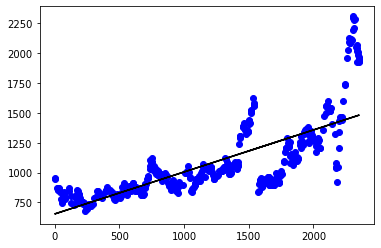

In [155]:
import matplotlib.pyplot as plt
Y_pred = classification_obj.predict(X_test_scaled)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, Y_pred, color ='k')